In [203]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from  sklearn.cluster import KMeans
import numpy as np
import itertools
from sklearn.metrics import silhouette_score
from sklearn.model_selection import  train_test_split
from  sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [204]:
df = pd.read_csv("Fifa 23 Players Data.csv")
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [205]:
df_n = df.select_dtypes(include='number')
df_n


,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,110000,21,174,68,1287,274,500,193000,...,50,44,50,41,38,41,40,36,40,15
18535,47,57,90000,17,175,60,1289,267,500,158000,...,45,45,45,47,48,47,49,49,49,15
18536,47,67,130000,18,170,65,1333,277,500,332000,...,52,49,52,46,44,46,46,42,46,17
18537,47,61,100000,17,178,65,1113,226,500,218000,...,33,33,33,44,42,44,47,49,47,15


In [206]:
df_n = df_n[df_n['Overall'] >= 85]
df_n



,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,85,90,76000000,24,184,81,2195,483,82000,134900000,...,84,81,84,86,82,86,85,82,85,20
87,85,89,76000000,25,178,73,2183,462,170000,146300000,...,84,80,84,72,71,72,70,68,70,21
88,85,85,26500000,32,191,86,1305,456,65000,45100000,...,34,36,34,34,36,34,34,36,34,85
89,85,85,17500000,33,183,79,1356,467,40000,29800000,...,37,40,37,33,36,33,32,32,32,85


In [207]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_n)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)


reduced_dataset = pd.DataFrame(reduced_data, columns=['pca1', 'pca2'])
print(reduced_dataset)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_dataset)

cluster_labels = kmeans.predict(reduced_dataset)

reduced_dataset['Cluster'] = cluster_labels
reduced_dataset['Known As'] = df['Known As']



         pca1      pca2
0   -4.302721 -5.838089
1   -3.404468 -3.642608
2   -3.445533 -2.892311
3   -5.267533 -2.113332
4   -4.307196 -4.929756
..        ...       ...
86  -3.209178  1.997641
87  -3.262290 -1.201405
88  14.866408  0.489203
89  13.719437 -0.983706
90  -3.104445 -2.036309

[91 rows x 2 columns]


C:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [208]:
print(reduced_dataset)

         pca1      pca2  Cluster        Known As
0   -4.302721 -5.838089        2        L. Messi
1   -3.404468 -3.642608        2      K. Benzema
2   -3.445533 -2.892311        2  R. Lewandowski
3   -5.267533 -2.113332        0    K. De Bruyne
4   -4.307196 -4.929756        2       K. Mbappé
..        ...       ...      ...             ...
86  -3.209178  1.997641        4    T. Hernández
87  -3.262290 -1.201405        0      Diogo Jota
88  14.866408  0.489203        1      P. Gulácsi
89  13.719437 -0.983706        1       Y. Sommer
90  -3.104445 -2.036309        0         M. Reus

[91 rows x 4 columns]


In [209]:
cris = reduced_dataset[reduced_dataset['Known As'] == 'Cristiano Ronaldo']
cris

,pca1,pca2,Cluster,Known As
8,-2.916351,-3.760516,2,Cristiano Ronaldo


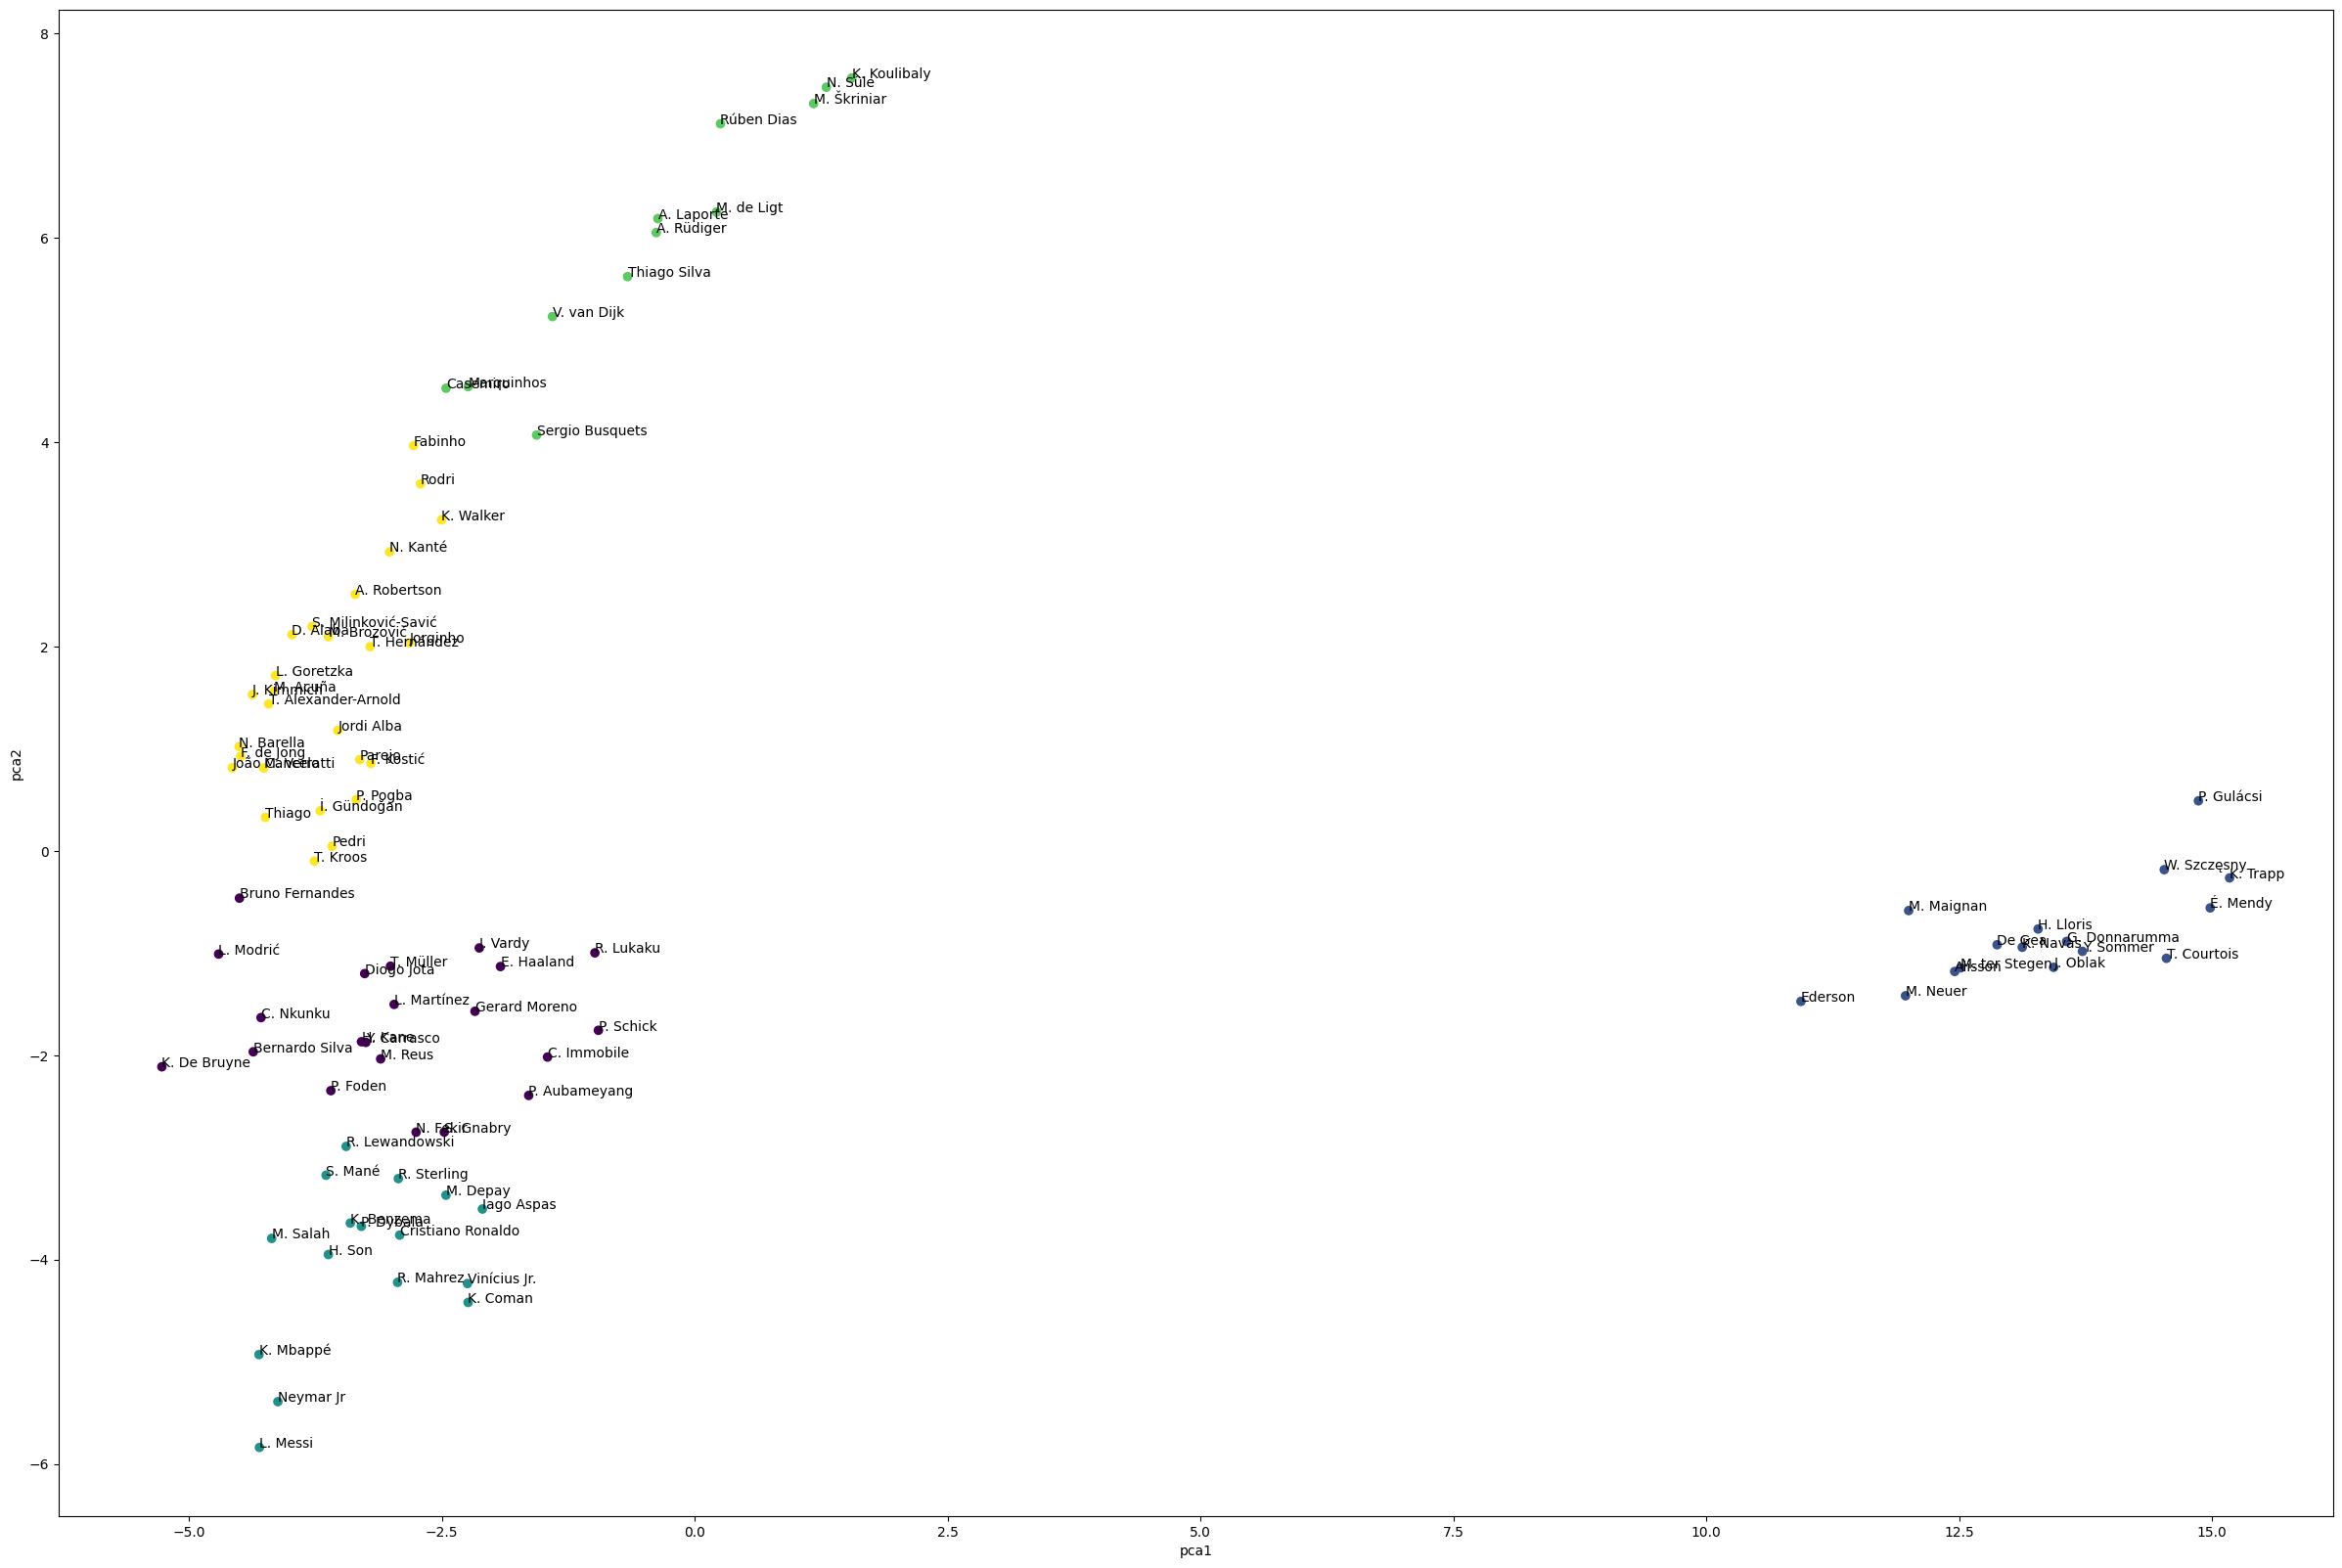

In [210]:

plt.figure(figsize=(30, 20))  # تنظیم اندازه فیگور

plt.scatter(reduced_dataset['pca1'], reduced_dataset['pca2'], c=reduced_dataset['Cluster'], cmap='viridis')
plt.xlabel('pca1')
plt.ylabel('pca2')

for i, player in reduced_dataset.iterrows():
    plt.annotate(player['Known As'], (player['pca1'], player['pca2']))

plt.show()

In [211]:
def euclidean_distance(data_point1, data_point2):
    return np.sqrt(np.sum((data_point1 - data_point2) ** 2))

messi = np.array([-4.302721, -5.838089])
embape = np.array([-4.307196, -4.929756])
cristiano = np.array([-2.916351, -3.760516])
taremii = np.array([-0.88197553 -1.24368558])
# محاسبه فاصله اقلیدسی بین دو داده
distance = euclidean_distance(messi, embape)

print(' فاصله مسی و امباپه:', distance)
distance2 = euclidean_distance(cristiano, embape)
print(' فاصله کریستیانو با امباپه:', distance2)

 فاصله مسی و امباپه: 0.9083440232169746
 فاصله کریستیانو با امباپه: 1.8170228373977584


In [212]:

taremi = df[df['Full Name'] == 'Mehdi Taremi'].select_dtypes(include='number')
normalized_taremi = scaler.transform(taremi)
pca_taremi = pca.transform(normalized_taremi)
taremi_cluster = kmeans.predict(pca_taremi)

C:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [213]:
print(pca_taremi)

[[-0.88197553 -1.24368558]]


In [214]:
dis_taremi_to_ronald =euclidean_distance(taremii, cristiano) 
print(' فاصله طارمی تا رونالدو:', dis_taremi_to_ronald)

 فاصله طارمی تا رونالدو: 1.8160234066512264


In [215]:
dis_taremi_to_messi =euclidean_distance(taremii, messi) 
print("فاصله طارمی تا مسی", dis_taremi_to_messi)

فاصله طارمی تا مسی 4.303685699850382


In [222]:
scaler = StandardScaler()
normalized_new_data = scaler.fit_transform(df_new)


pca = PCA(n_components=2)
reduced_new_data = pca.fit_transform(normalized_new_data)


reduced_new_dataset = pd.DataFrame(reduced_new_data, columns=['pca1', 'pca2'])
print(reduced_new_dataset)
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit_transform(reduced_new_dataset)
cluster_new_labels = kmeans.predict(reduced_new_dataset)
reduced_new_dataset['Cluster'] = kmeans.labels_


            pca1       pca2
0     -13.894015  10.066310
1     -13.842271   8.608881
2     -14.089068   8.278501
3     -16.172213   6.995771
4     -15.729872  10.882444
...          ...        ...
18534   4.451528   1.822953
18535   4.919542  -1.891453
18536   3.583432   0.557553
18537   8.741090  -4.477999
18538   6.066555  -2.553037

[18539 rows x 2 columns]


C:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [217]:
df_new = df.select_dtypes(include=['int64','float64'])
df_new

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,110000,21,174,68,1287,274,500,193000,...,50,44,50,41,38,41,40,36,40,15
18535,47,57,90000,17,175,60,1289,267,500,158000,...,45,45,45,47,48,47,49,49,49,15
18536,47,67,130000,18,170,65,1333,277,500,332000,...,52,49,52,46,44,46,46,42,46,17
18537,47,61,100000,17,178,65,1113,226,500,218000,...,33,33,33,44,42,44,47,49,47,15


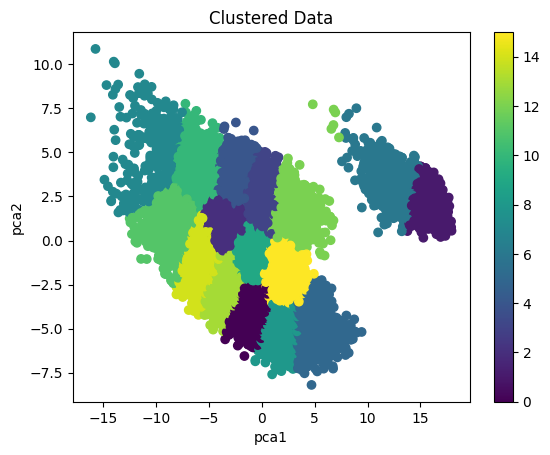

In [223]:
plt.scatter(reduced_new_dataset['pca1'], reduced_new_dataset['pca2'], c=reduced_new_dataset['Cluster'], cmap='viridis')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('Clustered Data')
plt.colorbar()
plt.show()

In [227]:



true_labels = df['Best Position']


labels_df = pd.DataFrame({'True Labels': true_labels, 'Cluster Labels': cluster_new_labels})


cluster_accuracies = {}
for cluster in range(16):
    cluster_mask = labels_df['Cluster Labels'] == cluster
    cluster_true_labels = labels_df[cluster_mask]['True Labels']
    if not cluster_true_labels.empty:
        most_common_label = cluster_true_labels.mode()[0]
        cluster_accuracy = accuracy_score(cluster_true_labels, [most_common_label] * len(cluster_true_labels))
        cluster_accuracies[f'Cluster {cluster}'] = cluster_accuracy
    else:
        
        cluster_accuracies[f'Cluster {cluster}'] = None


for cluster, accuracy in cluster_accuracies.items():
    print(f'{cluster} Accuracy: {accuracy:.2%}')

Cluster 0 Accuracy: 68.31%
Cluster 1 Accuracy: 100.00%
Cluster 2 Accuracy: 35.00%
Cluster 3 Accuracy: 51.23%
Cluster 4 Accuracy: 39.18%
Cluster 5 Accuracy: 91.13%
Cluster 6 Accuracy: 100.00%
Cluster 7 Accuracy: 34.16%
Cluster 8 Accuracy: 96.34%
Cluster 9 Accuracy: 17.26%
Cluster 10 Accuracy: 33.72%
Cluster 11 Accuracy: 28.48%
Cluster 12 Accuracy: 59.32%
Cluster 13 Accuracy: 28.10%
Cluster 14 Accuracy: 21.66%
Cluster 15 Accuracy: 17.28%


In [228]:
from sklearn.metrics import accuracy_score


true_labels = df['Best Position']


labels_df = pd.DataFrame({'True Labels': true_labels, 'Cluster Labels': cluster_new_labels})


highest_accuracy = 0.0
total_accuracy = 0.0
valid_cluster_count = 0


for cluster in range(16):
    cluster_mask = labels_df['Cluster Labels'] == cluster
    cluster_true_labels = labels_df[cluster_mask]['True Labels']
    if not cluster_true_labels.empty:
        most_common_label = cluster_true_labels.mode()[0]
        cluster_accuracy = accuracy_score(cluster_true_labels, [most_common_label] * len(cluster_true_labels))
        total_accuracy += cluster_accuracy
        valid_cluster_count += 1
        highest_accuracy = max(highest_accuracy, cluster_accuracy)

# Calculate average accuracy
average_accuracy = total_accuracy / valid_cluster_count if valid_cluster_count > 0 else None

# Print the results
print(f'Highest Accuracy: {highest_accuracy:.2%}')
print(f'Average Accuracy: {average_accuracy:.2%}')


Highest Accuracy: 100.00%
Average Accuracy: 51.32%
